<a href="https://colab.research.google.com/github/Nsquare1994/COT5600/blob/master/COT_5600_HW2_HADMARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

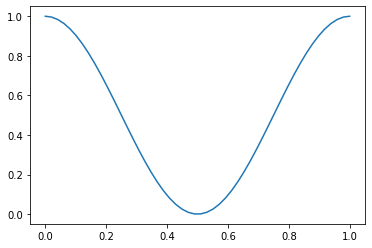

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

zero = np.array([[1.0],[0.0]])
one = np.array([[0.0],[1.0]])

hadamard = 1./np.sqrt(2) * np.array([[1, 1],[1, -1]])

def control_gate(x):
  return np.kron(np.outer(zero,zero), np.eye(2)) + np.kron(np.outer(one,one), x)

def hadamard_test(ket_psi, u):
  tensor0 = np.kron(zero, ket_psi)
  h = np.kron(hadamard, np.eye(2))
  controled = control_gate(u)
  H = np.matmul(h, tensor0)
  H = np.matmul(controled, H)
  H = np.matmul(h, H) 
  return H

def measurements(H):
  p = np.kron(np.outer(zero,zero), np.eye(2))
  p0 = scipy.linalg.norm(np.matmul(p, H))**2
  return p0


x = np.array([[0, 1],[1, 0]])
testsize = 50
X = np.linspace(0, 1, testsize)

space = []

for i in X: #i for theta
  u = np.diagflat([1, np.exp(2*np.pi*1j*i)])
  space.append(measurements(hadamard_test(one, u)))

plt.plot(X, space)
plt.show()